In [ ]:
#https://www.kaggle.com/datasets/ahemateja19bec1025/traffic-sign-dataset-classification

In [3]:
!pip install opendatasets

In [30]:
import opendatasets as od
import pandas as pd

In [31]:
od.download('https://www.kaggle.com/datasets/ahemateja19bec1025/traffic-sign-dataset-classification')

Skipping, found downloaded files in "./traffic-sign-dataset-classification" (use force=True to force download)


In [32]:
file = "traffic-sign-dataset-classification/labels.csv"

In [33]:
df = pd.read_csv(file)
df.head()

,ClassId,Name
0,0,Speed limit (5km/h)
1,1,Speed limit (15km/h)
2,2,Speed limit (30km/h)
3,3,Speed limit (40km/h)
4,4,Speed limit (50km/h)


In [34]:
df.shape

(58, 2)

In [35]:
df["Name"]

0              Speed limit (5km/h)
1             Speed limit (15km/h)
2             Speed limit (30km/h)
3             Speed limit (40km/h)
4             Speed limit (50km/h)
5             Speed limit (60km/h)
6             Speed limit (70km/h)
7             speed limit (80km/h)
8         Dont Go straight or left
9        Dont Go straight or Right
10                Dont Go straight
11                    Dont Go Left
12           Dont Go Left or Right
13                   Dont Go Right
14         Dont overtake from Left
15                        No Uturn
16                          No Car
17                         No horn
18            Speed limit (40km/h)
19            Speed limit (50km/h)
20            Go straight or right
21                     Go straight
22                         Go Left
23                Go Left or right
24                        Go Right
25                       keep Left
26                      keep Right
27            Roundabout mandatory
28              watc

In [42]:
import os
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import warnings
import tensorflow as tf
warnings.filterwarnings("ignore")

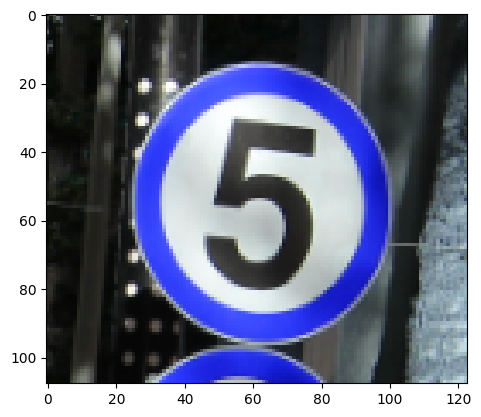

In [37]:
img1 = cv2.imread("/content/traffic-sign-dataset-classification/traffic_Data/DATA/0/000_0006.png")
plt.imshow(img1)

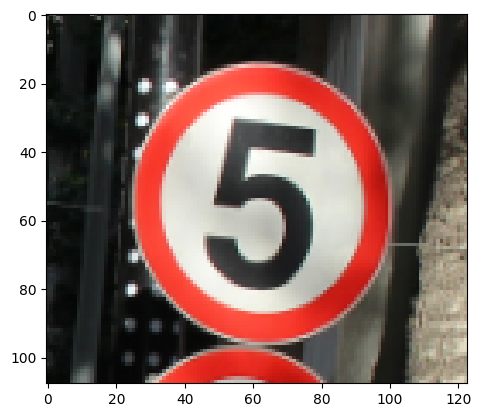

In [38]:
img1 = plt.imread("/content/traffic-sign-dataset-classification/traffic_Data/DATA/0/000_0006.png")
plt.imshow(img1)

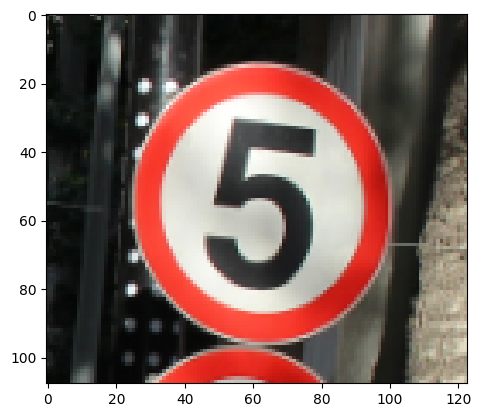

In [39]:
img1 = mpimg.imread("/content/traffic-sign-dataset-classification/traffic_Data/DATA/0/000_0006.png")
plt.imshow(img1)

In [40]:
img1

array([[[0.09803922, 0.09411765, 0.07843138],
        [0.23137255, 0.25882354, 0.25490198],
        [0.34901962, 0.36078432, 0.35686275],
        ...,
        [0.11372549, 0.11372549, 0.10196079],
        [0.14117648, 0.13725491, 0.11372549],
        [0.16862746, 0.16078432, 0.13333334]],

       [[0.27450982, 0.26666668, 0.23921569],
        [0.08235294, 0.10588235, 0.07450981],
        [0.22745098, 0.2627451 , 0.24313726],
        ...,
        [0.10588235, 0.10980392, 0.09411765],
        [0.14509805, 0.14509805, 0.12156863],
        [0.18431373, 0.17254902, 0.14901961]],

       [[0.13725491, 0.13725491, 0.12156863],
        [0.05098039, 0.0627451 , 0.04313726],
        [0.18431373, 0.20784314, 0.19215687],
        ...,
        [0.11764706, 0.12156863, 0.10196079],
        [0.19215687, 0.18431373, 0.16078432],
        [0.15686275, 0.14117648, 0.12156863]],

       ...,

       [[0.03137255, 0.04705882, 0.03137255],
        [0.03137255, 0.05098039, 0.03137255],
        [0.03529412, 0

In [44]:
dataset = "traffic-sign-dataset-classification"

train_ds = tf.keras.preprocessing.image_dataset_from_directory(dataset,validation_split=0.2,
                                                                subset="training",image_size=(224,224),
                                                               seed=100, batch_size=32)

Found 6164 files belonging to 1 classes.
Using 4932 files for training.


In [45]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(dataset,validation_split=0.2,
                                                                subset="validation",image_size=(224,224),
                                                               seed=100, batch_size=32)

Found 6164 files belonging to 1 classes.
Using 1232 files for validation.


In [56]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from keras.utils import to_categorical# change the category of different classes
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

In [52]:
model=Sequential()
model.add(Rescaling(1.0/255))
model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(256,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(64,activation="relu"))
model.add(Dense(58,activation="softmax"))


In [67]:
# keras.utils.plot_model(model,show_shapes=True,show_dtypes=True,show_layer_activations=True)

In [58]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer="adam",
              metrics=["Accuracy"])


In [59]:
# we can set the callback earlystopping function
define_callbacks=[EarlyStopping(monitor="val_loss",patience=3)]

history=model.fit(train_ds,validation_data=val_ds,epochs=5,callbacks=define_callbacks,batch_size=128)

Epoch 1/5
155/155 [==============================] - 34s 132ms/step - loss: 0.0446 - Accuracy: 0.9935 - val_loss: 0.0000e+00 - val_Accuracy: 1.0000
Epoch 2/5
155/155 [==============================] - 19s 122ms/step - loss: 0.0000e+00 - Accuracy: 1.0000 - val_loss: 0.0000e+00 - val_Accuracy: 1.0000
Epoch 3/5
155/155 [==============================] - 19s 120ms/step - loss: 0.0000e+00 - Accuracy: 1.0000 - val_loss: 0.0000e+00 - val_Accuracy: 1.0000
Epoch 4/5
155/155 [==============================] - 19s 124ms/step - loss: 0.0000e+00 - Accuracy: 1.0000 - val_loss: 0.0000e+00 - val_Accuracy: 1.0000


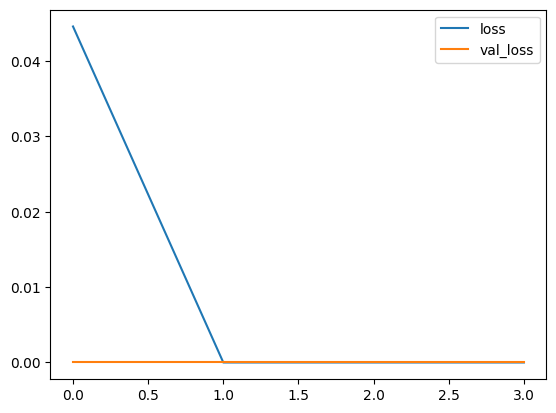

In [60]:
#plotting of graph
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["loss","val_loss"])

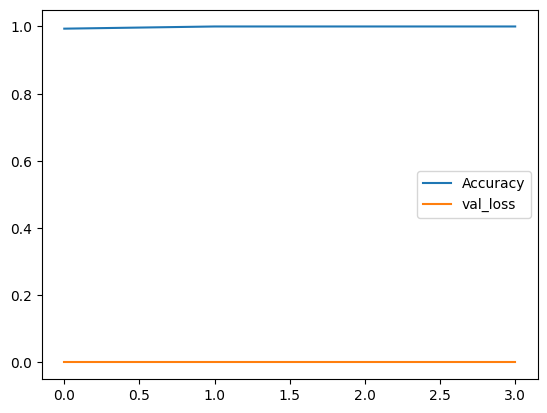

In [69]:
#plotting of graph
plt.plot(history.history["Accuracy"])
plt.plot(history.history["val_loss"])
plt.legend(["Accuracy","val_loss"])

In [70]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 128)     0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       7